#<font color = 'shade'> **Predict rented bike count using KNeighbors Regressor**</font>


# <font color = 'shade'>**Import/Install the packages**

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on Colab')
else:
    print('Not Running on Colab')

Running on Colab


In [ ]:
if 'google.colab' in str(get_ipython()):
  !pip install --upgrade feature_engine scikit-learn -q

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import feature_engine

In [ ]:
print(feature_engine.__version__)

1.6.2


In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.3.1


In [ ]:
"""Importing the required packages"""

# For DataFrames and manipulations
import pandas as pd
import numpy as np

# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

# save and load models
import joblib

# Pathlib to navigate file system
from pathlib import Path
import sys

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For categorical variables
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import RareLabelEncoder

# For scaling the data
from sklearn.preprocessing import StandardScaler

# creating pipelines
from sklearn.pipeline import Pipeline

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

# Using KNN classification for our data
from sklearn.neighbors import KNeighborsClassifier

# draws a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# We will use this to download the Dataset
from sklearn.datasets import fetch_openml

# feature engine log transformation
from feature_engine.transformation import LogTransformer

# feature engine wrapper
from feature_engine.wrappers import SklearnTransformerWrapper
# For scaling the data

from sklearn.preprocessing import MinMaxScaler
from feature_engine.transformation import LogTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.selection import DropFeatures
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine import transformation as vt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from sklearn.neighbors import KNeighborsRegressor

# <font color = 'shade'> **Specify Project Folder Location**

In [ ]:
if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
if 'google.colab' in str(get_ipython()):
    base_folder = Path('/content/drive/MyDrive/data/')

In [ ]:
data_folder = base_folder/'datasets'
save_model_folder = base_folder/'models/ml_fall_2023'
custom_function_folder = base_folder/'custom-functions'
save_model_folder.mkdir(exist_ok=True, parents=True)

# <font color = 'shade'> **Import Custom Functions from Python file**

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
sys.path.append(str(custom_function_folder))

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/data/custom-functions']

In [ ]:
!cp /content/drive/MyDrive/plot_learning_curve.py .
from  plot_learning_curve import plot_learning_curve

In [ ]:
!cp /content/drive/MyDrive/eda_plots.py .
from eda_plots import diagnostic_plots, plot_target_by_category

#  <font color ='shade'>**KNN Regression on Bike Sharing Dataset**

- Download the data from following link: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand'




##  <font color ='shade'>**Task1 (6 Points): Do the EDA and identify the preprocessing steps.**

In [ ]:
data='/content/drive/MyDrive/AML/data/SeoulBikeData.csv'

In [ ]:
df=pd.read_csv(data,encoding='unicode_escape')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#checking a few rows of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1


In [ ]:
#looking at column names
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month'],
      dtype='object')

In [ ]:
#check data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#Converting Date to Date data type
df.Date = pd.to_datetime(df.Date)
df['Date'][0:20]

0    2017-01-12
1    2017-01-12
2    2017-01-12
3    2017-01-12
4    2017-01-12
5    2017-01-12
6    2017-01-12
7    2017-01-12
8    2017-01-12
9    2017-01-12
10   2017-01-12
11   2017-01-12
12   2017-01-12
13   2017-01-12
14   2017-01-12
15   2017-01-12
16   2017-01-12
17   2017-01-12
18   2017-01-12
19   2017-01-12
Name: Date, dtype: datetime64[ns]

In [ ]:
#instead of using the entire date, we will use just the month for our prediction. Extracting month from date :
df['month'] = df['Date'].dt.month
df['month']=df['month'].astype('object')

In [ ]:
#check for unique values. The number of unique values is a good indicator of errors in the dataset itself.
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
dtype: int64

In [ ]:
#describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
# To check the duplicates of the data
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day, month]
Index: []


In [ ]:
# check missing values in data
df.isna()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# calculate % of mssing values for each column
df.isna().mean()*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
month                        0.0
dtype: float64

In [ ]:
# Create a list of categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']

# Create a list of discrete variables
discrete = [
    var for var in df.columns if df[var].dtype != 'O'
    and len(df[var].unique()) < 25 and var not in ['Rented Bike Count'] #for this dataset, we can treat hour as discrete
]

# Create a list of continuous Variables
continuous = [
    var for var in df.columns if df[var].dtype != 'O'
    if var not in discrete and var not in ['Rented Bike Count']
]

In [ ]:
categorical

['Seasons', 'Holiday', 'Functioning Day', 'month']

In [ ]:
discrete

['Hour']

In [ ]:
continuous

['Date',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
# Check number of unique values for continuous variables
total_unique_values= df[continuous].nunique()
for key, value in total_unique_values.items():
    if value > 0:
        print(key,":",value)

Date : 365
Temperature(°C) : 546
Humidity(%) : 90
Wind speed (m/s) : 65
Visibility (10m) : 1789
Dew point temperature(°C) : 556
Solar Radiation (MJ/m2) : 345
Rainfall(mm) : 61
Snowfall (cm) : 51


In [ ]:
# we will check the first 20 values
for var in continuous:
    print(var, df[var].unique()[0:20], '\n')

Date ['2017-01-12T00:00:00.000000000' '2017-02-12T00:00:00.000000000'
 '2017-03-12T00:00:00.000000000' '2017-04-12T00:00:00.000000000'
 '2017-05-12T00:00:00.000000000' '2017-06-12T00:00:00.000000000'
 '2017-07-12T00:00:00.000000000' '2017-08-12T00:00:00.000000000'
 '2017-09-12T00:00:00.000000000' '2017-10-12T00:00:00.000000000'
 '2017-11-12T00:00:00.000000000' '2017-12-12T00:00:00.000000000'
 '2017-12-13T00:00:00.000000000' '2017-12-14T00:00:00.000000000'
 '2017-12-15T00:00:00.000000000' '2017-12-16T00:00:00.000000000'
 '2017-12-17T00:00:00.000000000' '2017-12-18T00:00:00.000000000'
 '2017-12-19T00:00:00.000000000' '2017-12-20T00:00:00.000000000'] 

Temperature(°C) [-5.2 -5.5 -6.  -6.2 -6.4 -6.6 -7.4 -7.6 -6.5 -3.5 -0.5  1.7  2.4  3.
  2.1  1.2  0.8  0.6  0.  -0.3] 

Humidity(%) [37 38 39 40 36 35 27 24 21 23 25 26 54 58 66 77 79 81 83 84] 

Wind speed (m/s) [2.2 0.8 1.  0.9 2.3 1.5 1.3 1.1 0.5 1.2 1.4 1.6 2.  3.2 4.2 1.7 0.6 2.1
 2.5 1.8] 

Visibility (10m) [2000 1928 1996 1936  793 1

In [ ]:
# Check number of unique values for categorical variables
total_unique_values= df[categorical].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Seasons : 4
Holiday : 2
Functioning Day : 2
month : 12


In [ ]:
# check values for categorical variables
for var in categorical:
    print(var, df[var].unique(), '\n')

Seasons ['Winter' 'Spring' 'Summer' 'Autumn'] 

Holiday ['No Holiday' 'Holiday'] 

Functioning Day ['Yes' 'No'] 

month [1 2 3 4 5 6 7 8 9 10 11 12] 



In [ ]:
# Check number of unique values for categorical variables
total_unique_values= df[discrete].nunique()
for key,value in total_unique_values.items():
    if value >0:
        print(key,":",value)

Hour : 24


In [ ]:
for var in discrete:
    print(var, df[var].unique(), '\n')

Hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23] 



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
def check_rare(df, var):
    """
    Plot the frequency of categories for a given variable and highlight categories that occur less than 5% of the time.

    Parameters:
    - df (DataFrame): The input DataFrame containing the variable to be analyzed.
    - var (str): The variable for which the frequency of categories is to be plotted.

    Returns:
    None. A bar plot is displayed.

    Note:
    A horizontal red line is drawn at y=5 to indicate the threshold for rare categories.
    """

    # Calculate the frequency of each category as a percentage of the total for the given variable
    cat_freq = 100 * df[var].value_counts(normalize=True)

    # Plot the frequencies in descending order
    fig = cat_freq.sort_values(ascending=False).plot.bar()

    # Draw a horizontal red line at y=5 as the threshold for rare categories
    fig.axhline(y=5, color='red')

    # Set axis labels and title
    fig.set_ylabel('category percentage frequency')
    fig.set_xlabel(var)
    fig.set_title(f'Identifying Rare Categories for {var}')

    # Show the plot
    plt.show()

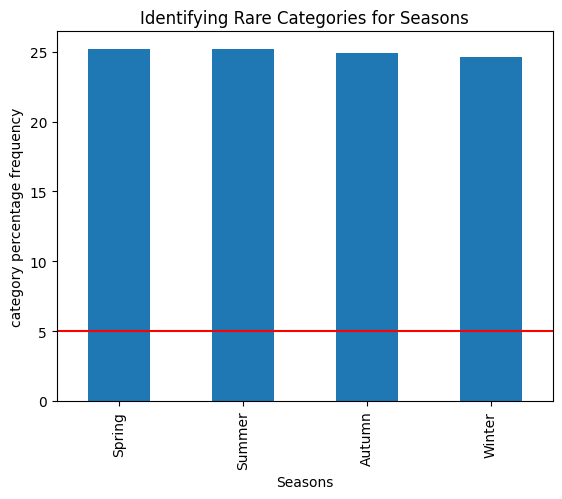

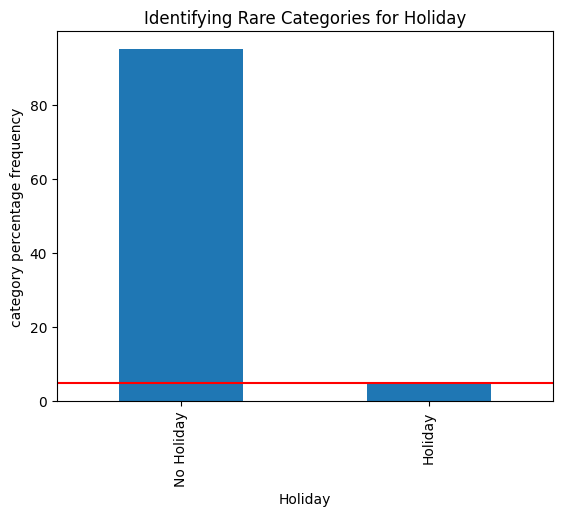

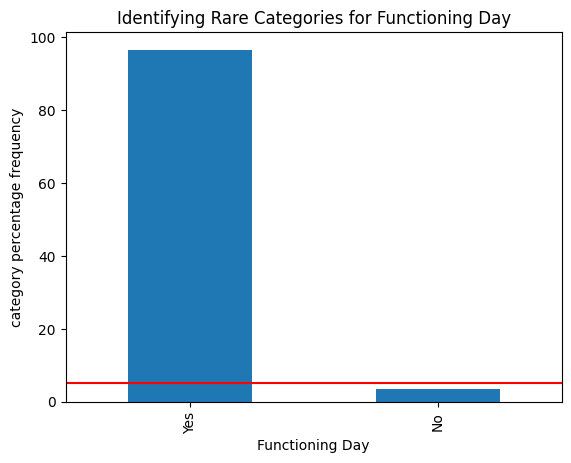

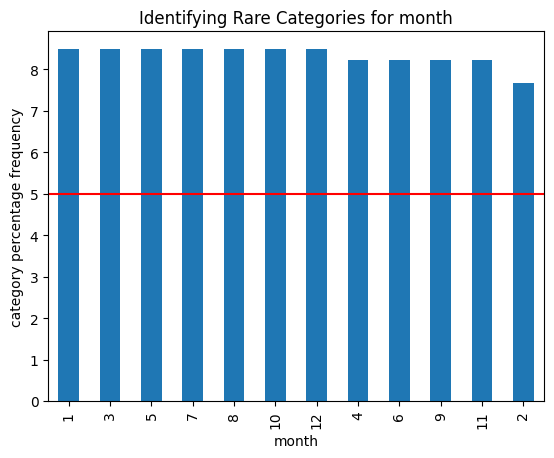

In [ ]:
for var in categorical:
    check_rare(df, var)

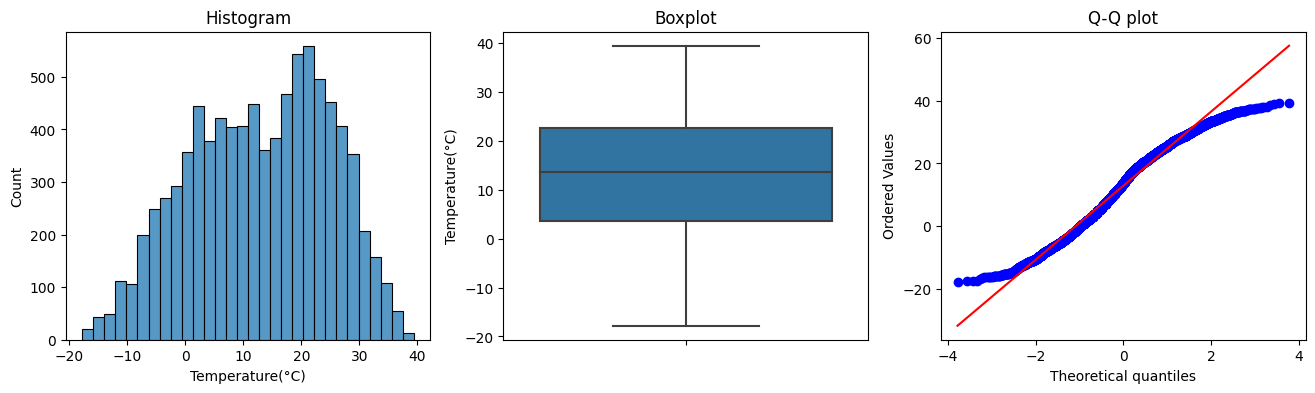

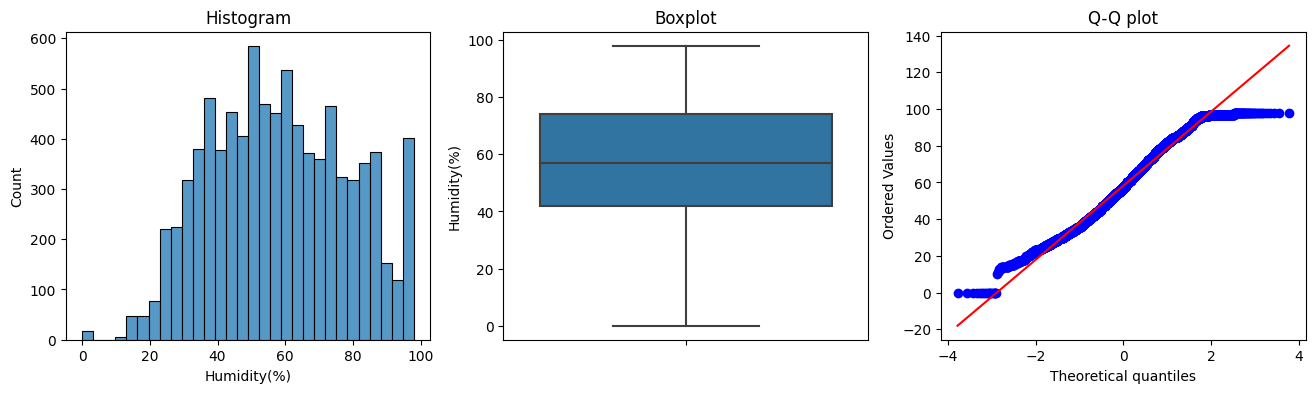

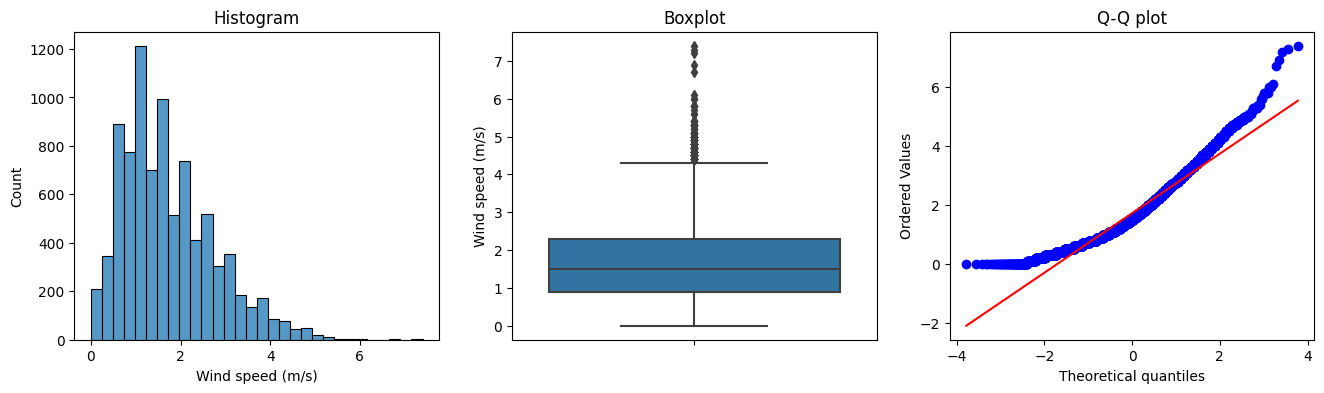

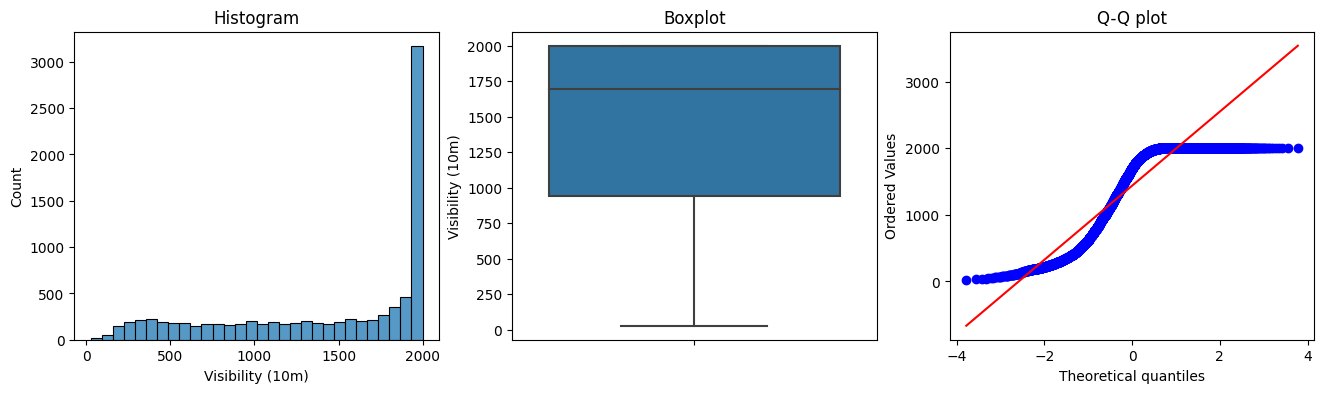

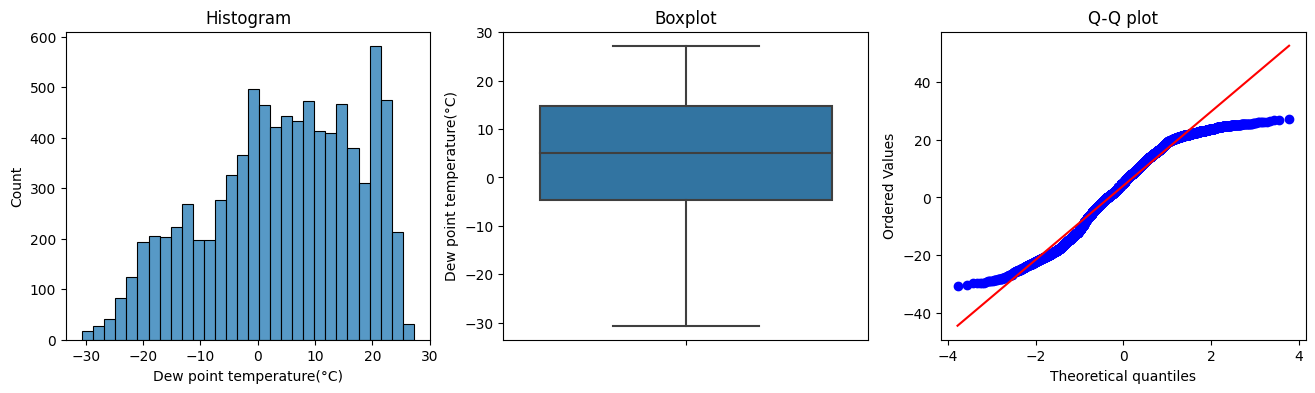

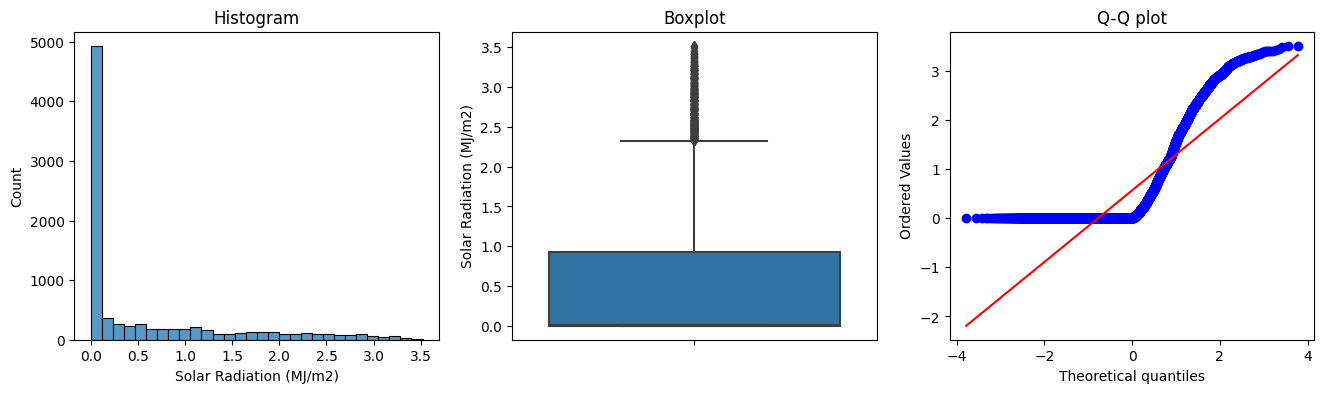

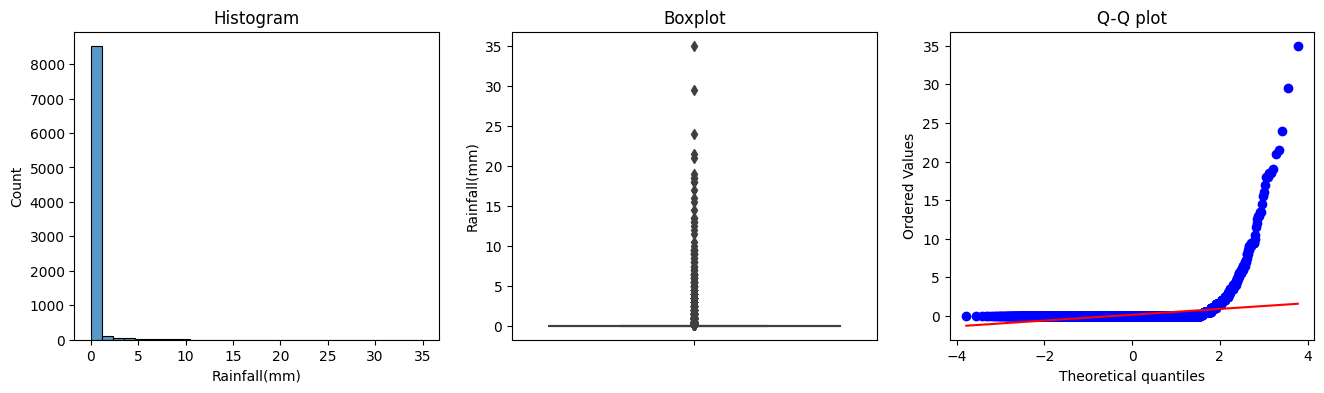

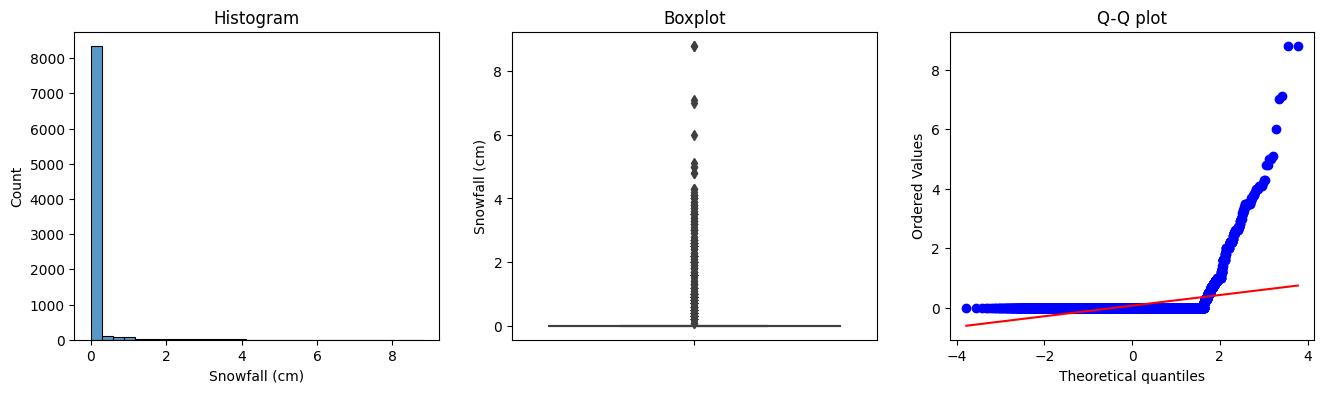

In [ ]:
#since this is not a binary classification problem, we can skip the step of checking target variable disrtibution.
#checking distribution of continuous variables
for var in continuous:
  if var!='Date':
    diagnostic_plots(df, var)

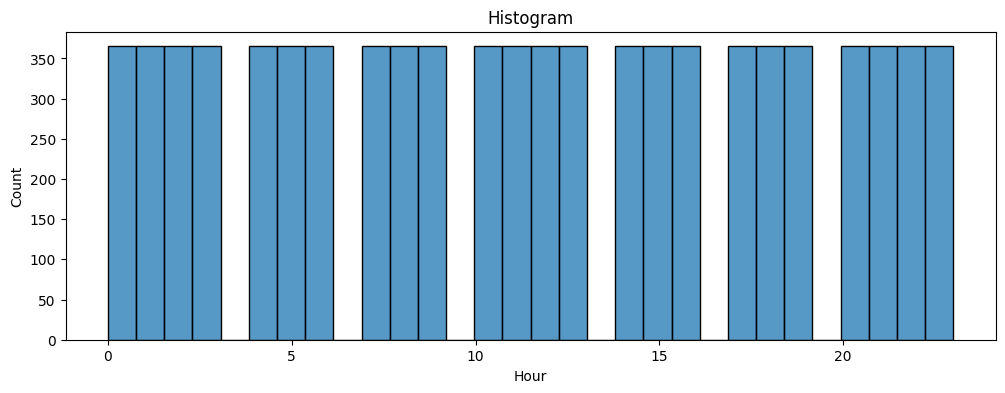

In [ ]:
# histograms for discrete variables
for var in discrete:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 1, 1)
    sns.histplot(df[var], bins=30)
    plt.title('Histogram')

<ipython-input-257-fc4bd98c5393>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df[discrete + continuous].corr().round(2)


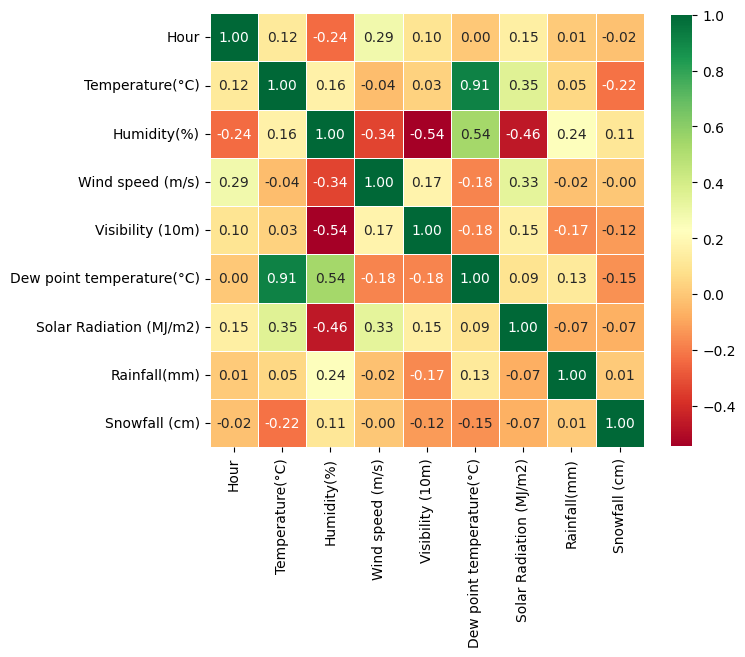

In [ ]:
# We can check the correlation between every pair of attributes
# The correlation will be generated for the numerical data only
# we will use df.corr() to get correlatons and then use sns.heatmap to print the correlation matrix
corrmat = df[discrete + continuous].corr().round(2)
top_corr_features = corrmat.index
plt.figure(figsize=(7, 7))
sns.heatmap(df[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
            cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

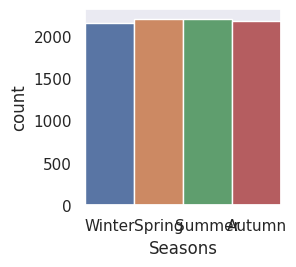

In [ ]:
#relation between rented bike count and season.
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x=df['Seasons'], data=df,width=1,)
#looks like count remains similar across seasons.

**Conclusion from EDA**
1. We do not have missing values, no need for data imputation.
2. Number of unique values indicate no issues in data collection.
3. Dew point temperature and Temperature are highly correlated. We will drop Dew point temperature.
4. Wind speed is skewed, we will perform log tranformation on it.
5. Visibility, Solar Radiation, Rainfall, Snowfall, Humidity have non-standard distributions. We will do K-means discretization.
6. Functioning Day 'No' is a rare category. We will do rare label encoding for it.
7. We will also perform one hot encoding for discrete and categorical variables.
8. We will only use month value from the date, so we will drop date column.
9. The scales for temperature, humidity, windspeed,visibility,snowfall,rainfall,solar radiation are very different. We will perform Standard Scaling for them.


##  <font color ='shade'>**Task2: Create a pipeline of regressor and preprocessing steps**


In [ ]:
# before doing any data cleaning step we need to first split the data into train/test
X = df.drop(['Rented Bike Count'], axis =1)
y = df['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:

columns_to_drop = ['Date', 'Dew point temperature(°C)']
preprocessing_steps = Pipeline([
  ('drop_features',
      DropFeatures(columns_to_drop)),
  ('YJ_transformer',
   YeoJohnsonTransformer(variables = ['Wind speed (m/s)','Temperature(°C)'])),
  ('discretizer_',
      SklearnTransformerWrapper(KBinsDiscretizer(encode= 'ordinal', strategy = 'kmeans', subsample=None),
                               variables = ['Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Humidity(%)'])),
  ('rare_label_encoder',
      RareLabelEncoder(variables='Functioning Day',replace_with='Rare')),
  ('one_hot_encoder',
     OneHotEncoder(variables=categorical+discrete
                   ,drop_last= True, ignore_format=True)),
  ('scalar',
      SklearnTransformerWrapper(MinMaxScaler(), variables = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)'])),


])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class ConvertToNumpyArray(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return np.array(X)

In [ ]:
bike_pipeline = Pipeline([
    ('preprocessor', preprocessing_steps),  # preprocessing steps
    ('convert_to_numpy', ConvertToNumpyArray()),  # ustom numpy converter
    ('knn', KNeighborsRegressor())  # K-Nearest Neighbors classifier
])

In [ ]:
bike_pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'convert_to_numpy', 'knn', 'preprocessor__memory', 'preprocessor__steps', 'preprocessor__verbose', 'preprocessor__drop_features', 'preprocessor__YJ_transformer', 'preprocessor__discretizer_', 'preprocessor__rare_label_encoder', 'preprocessor__one_hot_encoder', 'preprocessor__scalar', 'preprocessor__drop_features__features_to_drop', 'preprocessor__YJ_transformer__variables', 'preprocessor__discretizer___transformer__dtype', 'preprocessor__discretizer___transformer__encode', 'preprocessor__discretizer___transformer__n_bins', 'preprocessor__discretizer___transformer__random_state', 'preprocessor__discretizer___transformer__strategy', 'preprocessor__discretizer___transformer__subsample', 'preprocessor__discretizer___transformer', 'preprocessor__discretizer___variables', 'preprocessor__rare_label_encoder__ignore_format', 'preprocessor__rare_label_encoder__max_n_categories', 'preprocessor__rare_label_encoder__missing_values', 'preproce

In [ ]:
param_grid_1 = {
    # try different feature engineering parameters
    'preprocessor__scalar__transformer':[StandardScaler(), MinMaxScaler()],
    'knn__n_neighbors': np.arange(10,30,2)
}

In [ ]:
grid_knn_1 = GridSearchCV(bike_pipeline, param_grid_1,
                           cv=5, return_train_score= True,n_jobs=-1)

In [ ]:
grid_knn_1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/feature_engine/encoding/rare_label.py:216: UserWarning: The number of unique categories for variable Functioning Day is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        Pipeline(steps=[('drop_features',
                                                         DropFeatures(features_to_drop=['Date',
                                                                                        'Dew '
                                                                                        'point '
                                                                                        'temperature(°C)'])),
                                                        ('YJ_transformer',
                                                         YeoJohnsonTransformer(variables=['Wind '
                                                                                          'speed '
                                                                                          '(m/s)',
                                                                                          'Temperature(°C)'])),
                                                        ('discretizer_',
                                                         SklearnTransformerWrapper(transformer=KBinsDiscretizer(encode='ordinal',
                                                                                                                strat...
                                                                                              'speed '
                                                                                              '(m/s)',
                                                                                              'Visibility '
                                                                                              '(10m)',
                                                                                              'Solar '
                                                                                              'Radiation '
                                                                                              '(MJ/m2)',
                                                                                              'Rainfall(mm)',
                                                                                              'Snowfall '
                                                                                              '(cm)']))])),
                                       ('convert_to_numpy',
                                        ConvertToNumpyArray()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                         'preprocessor__scalar__transformer': [StandardScaler(),
                                                               MinMaxScaler()]},
             return_train_score=True)

In [ ]:
print(grid_knn_1.best_params_)

{'knn__n_neighbors': 10, 'preprocessor__scalar__transformer': StandardScaler()}


In [ ]:
file_best_est_knn_reg = save_model_folder / 'knn_reg_best_estimator.pkl'
file_complete_grid_knn_reg = save_model_folder / 'knn_reg_complete_grid.pkl'

In [ ]:
joblib.dump(grid_knn_1.best_estimator_, file_best_est_knn_reg)
joblib.dump(grid_knn_1, file_complete_grid_knn_reg)

['/content/drive/MyDrive/data/models/ml_fall_2023/knn_reg_complete_grid.pkl']

In [ ]:
loaded_best_estimator_knn_reg = joblib.load(file_best_est_knn_reg)
loaded_complete_grid_knn_reg = joblib.load(file_complete_grid_knn_reg)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

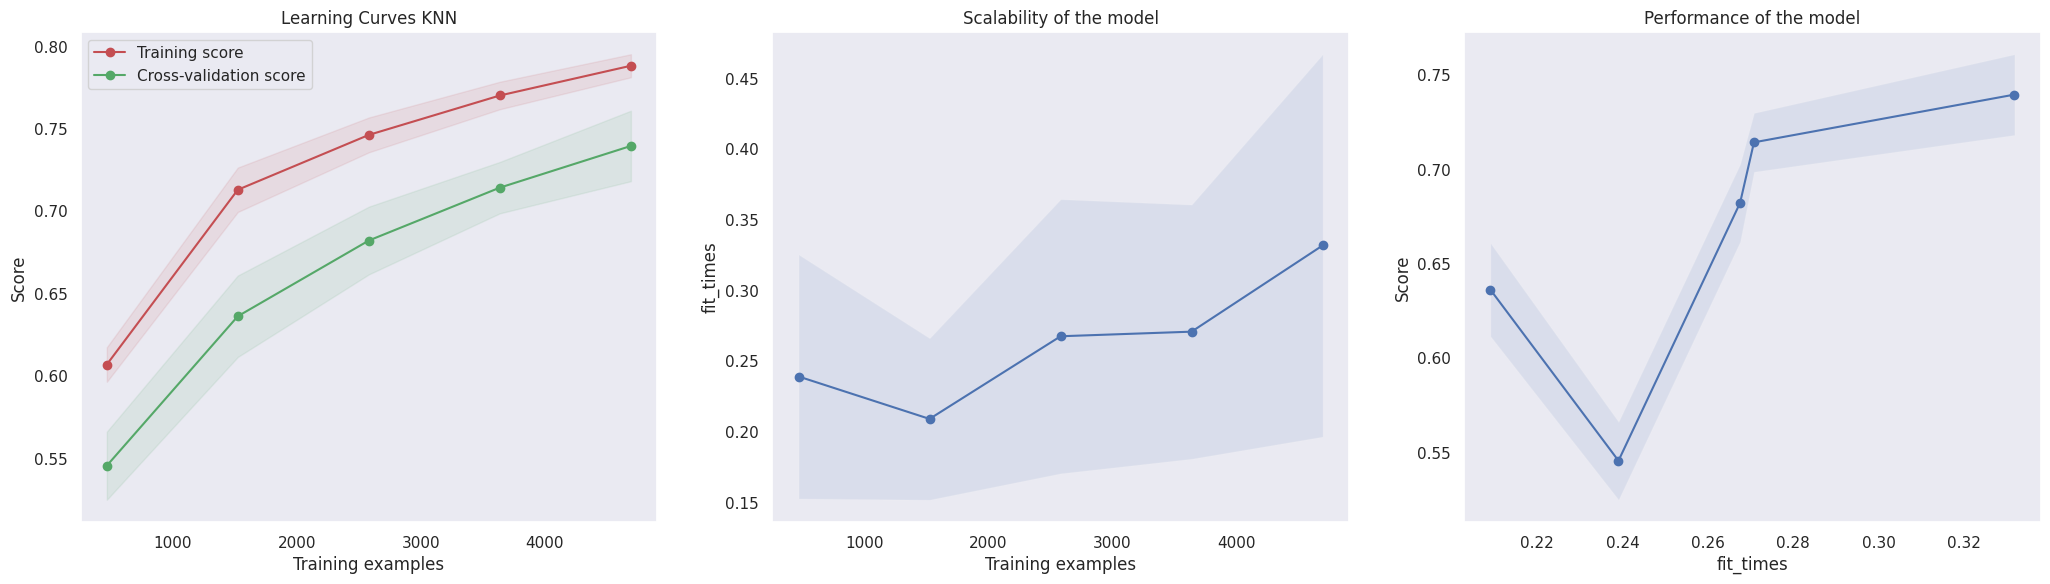

In [ ]:
plot_learning_curve(loaded_best_estimator_knn_reg  , 'Learning Curves KNN', X_train, y_train, n_jobs=-1)

In [ ]:
#let's check the train scores
print(loaded_best_estimator_knn_reg.score(X_train,y_train))

#let's check the cross validation score
print(loaded_complete_grid_knn_reg.best_score_)

0.8015405187023754
0.7386306184104467


In [ ]:
print(f'Test data accuracy for best model: {loaded_best_estimator_knn_reg.score(X_test,y_test)}')

Test data accuracy for best model: 0.7519910431488079


We have found the best model with accuracy 75.2%
Its hyperparameters are: 'knn__n_neighbors': 10, 'preprocessor__scalar__transformer': StandardScaler().


